In [2]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook",style="whitegrid",palette="dark")
sns.set_style({'font.sans-serif': ['simhei', 'Arial']})

In [65]:
df = pd.read_csv('datas/lianjia.csv',names=['area','floor_area','total_price'])
df.head(15)

,area,floor_area,total_price
0,11,109.46,200.0
1,1,91.35,420.0
2,2,87.39,195.0
3,6,43.60,125.0
4,6,61.44,120.0
5,2,105.30,328.0
6,2,78.16,260.0
7,4,114.17,680.0
8,4,77.66,330.0
9,6,79.88,232.0


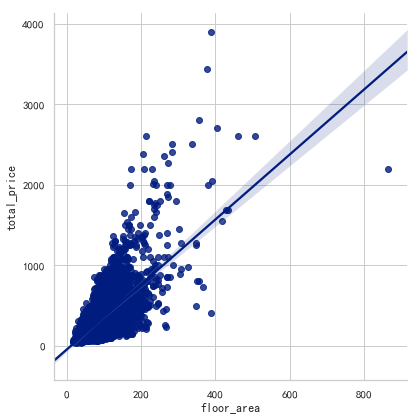

In [67]:
sns.lmplot('floor_area','total_price',df,height=6,fit_reg=True)

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

df1 = pd.read_csv('datas/lianjia.csv',names=['area','floor_area','total_price'])
df1.head(10)

,area,floor_area,total_price
0,4,109.46,200.0
1,10,91.35,420.0
2,5,87.39,195.0
3,7,43.60,125.0
4,7,61.44,120.0
5,5,105.30,328.0
6,5,78.16,260.0
7,9,114.17,680.0
8,9,77.66,330.0
9,7,79.88,232.0


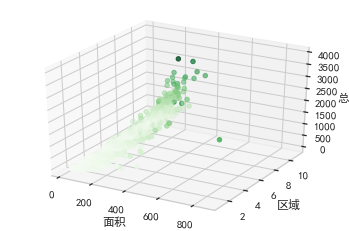

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('面积')
ax.set_ylabel('区域')
ax.set_zlabel('总价')
ax.scatter3D(df1['floor_area'],df1['area'],df1['total_price'],c=df1['total_price'],cmap='Greens')

In [6]:
def normalize_feature(df):
    return df.apply(lambda column:(column-column.mean())/column.std())
df = normalize_feature(df1)
df.head()

,area,floor_area,total_price
0,-1.005528,0.498658,-0.528742
1,1.226734,0.011280,0.451716
2,-0.633484,-0.095292,-0.551025
3,0.110603,-1.273773,-0.862989
4,0.110603,-0.793661,-0.885273


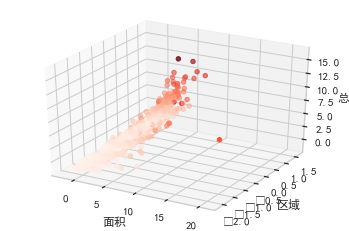

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('面积')
ax.set_ylabel('区域')
ax.set_zlabel('总价')
ax.scatter3D(df['floor_area'],df['area'],df['total_price'],c=df['total_price'], cmap='Reds')

In [86]:
import numpy as np
ones = pd.DataFrame({'ones':np.ones(len(df))})
df = pd.concat([ones,df],axis=1)
df.head()

,ones,area,floor_area,total_price
0,1.0,2.427766,0.498658,-0.528742
1,1.0,-1.291883,0.011280,0.451716
2,1.0,-0.919918,-0.095292,-0.551025
3,1.0,0.567942,-1.273773,-0.862989
4,1.0,0.567942,-0.793661,-0.885273


In [87]:
#获取x和y
x_data = np.array(df[df.columns[0:3]])
y_data = np.array(df[df.columns[-1]]).reshape(len(df),1)

print(x_data.shape, type(x_data))
print(y_data.shape, type(y_data))

(8951, 3) <class 'numpy.ndarray'>
(8951, 1) <class 'numpy.ndarray'>


In [88]:
import tensorflow as tf
tf.reset_default_graph()

alpha = 0.01 # 学习率
epoch = 500 # 训练全量数据集的轮数

# 输入x，形状为[8951,3]
x = tf.placeholder(tf.float32, x_data.shape)
# 输出y,形状为[8951,1]
y = tf.placeholder(tf.float32, y_data.shape)
# 定义权重变量w，形状为[3,1]
w = tf.get_variable("weights", (x_data.shape[1], 1), initializer=tf.constant_initializer())

# 假设函数h(x)=w0*x0+w1*x1+w2*x2,其中x0恒为1
# 推理值y_pred
y_pred = tf.matmul(x,w)

# 损失函数采用最小二乘法，调用tf的矩阵相乘方法
loss_op = 1 / (2* len(x_data)) * tf.matmul((y_pred-y), (y_pred -y), transpose_a = True)
# 随机梯度下降优化器 opt
opt = tf.train.GradientDescentOptimizer(learning_rate=alpha)
# 单轮训练操作 train_op
train_op = opt.minimize(loss_op)

In [89]:
# 创建会话来训练数据
with tf.Session() as sess:
    # 初始化全局变量
    sess.run(tf.global_variables_initializer())
    # 开始训练模型，因为训练集较小，所以每轮都使用全量数据训练
    for e in range(1,epoch + 1):
        sess.run(train_op, feed_dict={x: x_data, y: y_data})
        if e % 10 == 0:
            loss, w = sess.run([loss_op, w], feed_dict = {x: x_data, y: y_data})
            log_str = "Epoch %d \t Loss=%.4g \t Model: y = %.4gx1 + %.4gx2 + %.4g"
            print(log_str % (e, loss, w[1], w[2], w[0]))

Epoch 10 	 Loss=0.4504 	 Model: y = -0.02947x1 + 0.06405x2 + 5.617e-11


TypeError: Fetch argument array([[ 5.6170384e-11],
       [-2.9468084e-02],
       [ 6.4045213e-02]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)